In [2]:
import pandas as pd
from collections import Counter, defaultdict
import matplotlib.pyplot as plt

In [40]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

## Data Analysis on data

In [4]:
json_path = "annotations/subtask1/train.json"
data = pd.read_json(json_path)

In [157]:
data.head(10)

,id,text,labels,link
0,65635,THIS IS WHY YOU NEED\n\nA SHARPIE WITH YOU AT ALL TIMES,[Black-and-white Fallacy/Dictatorship],https://www.facebook.com/photo/?fbid=4023552137722493&set=g.633131750534436
1,67927,"GOOD NEWS!\n\nNAZANIN ZAGHARI-RATCLIFFE AND ANOOSHEH ASHOORI HAVE BEEN RELEASED\n\nAfter years of being unjustly detained in Iran, they are making their way safely back to the UK.","[Loaded Language, Glittering generalities (Virtue)]",https://www.facebook.com/amnesty/photos/5311988665480629/
2,68031,PAING PHYO MIN IS FREE!,[],https://www.facebook.com/amnesty/photos/4274191309260375/
3,77490,"Move your ships away!\n\noooook\n\nMove your ships away!\n\nNo, and I just added 10 more",[],https://www.facebook.com/rightpatriots/photos/pb.100064494145299.-2207520000./606109399734747/?type=3
4,67641,"WHEN YOU'RE THE FBI, THEY LET YOU DO IT.",[Thought-terminating cliché],https://www.facebook.com/AddictingInfoOrg/photos/pb.100064605613096.-2207520000./8283258671714532/?type=3
5,66402,PUTIN'S SECRET CAMOUFLAGE ARMY,[],https://www.facebook.com/photo/?fbid=1261268274677920&set=g.655806642139792
6,79204,JANUARY 2021\n\nYOU DON'T BUY A 12 MILLION DOLLAR WATERFRONT HOUSE ON MARTHA'S VINEYARD IF YOU REALLY BELIEVE THE OCEANS ARE RISING.,[Whataboutism],https://www.facebook.com/ResistanceFeed/photos/pb.100060243732164.-2207520000./4638295969592134/?type=3
7,79372,Term Limits Are Everywhere & Politicians Can't Ignore It\n\nTERM LIMITS AHEAD,[Slogans],null
8,68254,Nicola Sturgeon\n\nWE'RE SCOTTISH GETUSOUTOFHERE!\n\nWill his bushtucker trial involve skydiving into the jungle without the appropriate PPE,[],https://www.facebook.com/photo/?fbid=435275678775797&set=g.442786093284737
9,69640,I saw a movie once where only the police and military had guns.\n\nIt was called Schindler's List.,[],https://www.facebook.com/GovLookout/photos/pb.100067467483201.-2207520000./734208890049268/?type=3


In [158]:
print(f"Total number of observations: {len(data)}")

Total number of observations: 7000


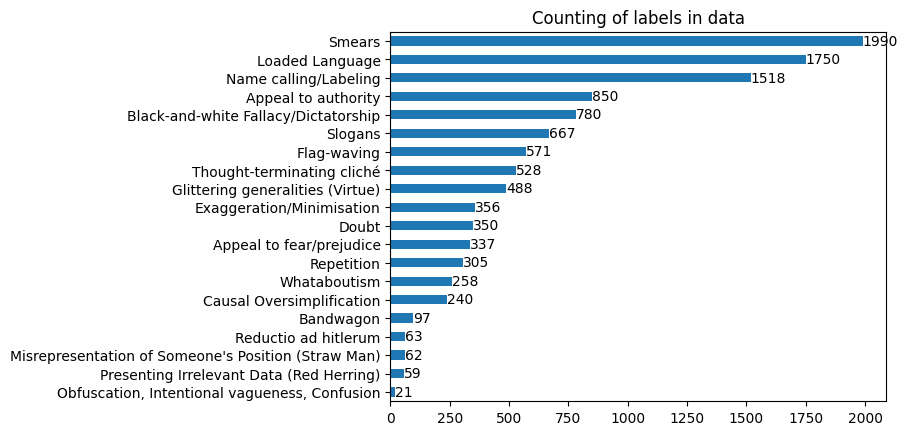

In [159]:
count_labels = Counter()
for i, item in data["labels"].items():
    count_labels.update(item)

df = pd.DataFrame.from_dict(count_labels, orient='index', columns=["count"])
df_sorted = df.sort_values(by='count')

ax = df_sorted.plot(kind="barh", legend=False)

for index, value in enumerate(df_sorted['count']):
    ax.text(value, index, str(value), ha='left', va='center')

plt.title("Counting of labels in data")
plt.show()

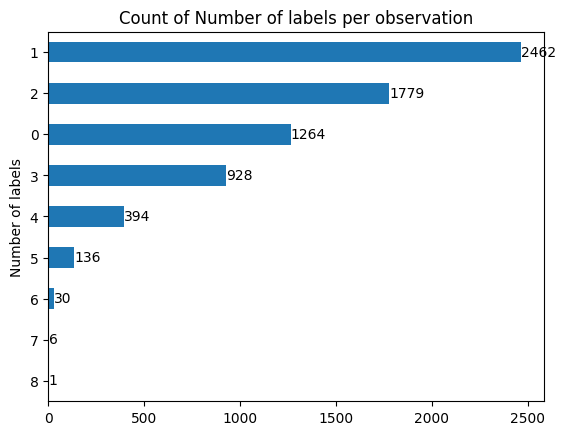

In [160]:
count_number_labels = Counter()
for i, item in data["labels"].items():
    count_number_labels.update(str(len(item)))

df = pd.DataFrame.from_dict(count_number_labels, orient='index', columns=["count"])
df_sorted = df.sort_values(by='count')

ax = df_sorted.plot(kind="barh", legend=False)

plt.ylabel('Number of labels')

for index, value in enumerate(df_sorted['count']):
    ax.text(value, index, str(value), ha='left', va='center')

plt.title("Count of Number of labels per observation")
plt.show()

In [12]:
# Checking if the are labels in the data which don't appear in the estated ouput classes:
with open("output-classes-subtask1.txt") as file:
    all_classes = file.read()
    all_classes = all_classes.split("\n")

labels_in_data = set()
for i, item in data["labels"].items():
    labels_in_data.update(item)

label_count = 0
for label in labels_in_data:
    if label not in all_classes:
        print(label)
        label_count += 1
print(f"Number of labels not in data: {label_count}")

# Checking number of null links:
null_links = sum(~data["link"].str.startswith("https://"))
print(f"Number of null links: {null_links}")

Number of labels not in data: 0
Number of null links: 1130


In [162]:
# Counting number of words at each observation
data["words"] = data["text"].str.split().str.len()

# Counting total of words for each label
count_words = defaultdict(int)
for i, item in data["labels"].items():
    for label in item:
        count_words[label] += data.iloc[i, :]["words"]

# Calculating the average of number of words per each label
for label, count in count_words.items():
    count_words[label] = count_words[label] / count_labels[label]

# Displaying average number of words per label
count_words_df = pd.DataFrame.from_dict(count_words, orient="index")
count_words_df = count_words_df.reset_index()
count_words_df = count_words_df.rename(columns={"index": "label", 0: "average"})
count_words_df.sort_values(by="average", ascending=False)

,label,average
11,Repetition,33.088525
17,"Obfuscation, Intentional vagueness, Confusion",31.523810
9,Appeal to authority,30.497647
4,Whataboutism,27.968992
3,Thought-terminating cliché,26.024621
15,Doubt,25.917143
13,Appeal to fear/prejudice,25.489614
6,Causal Oversimplification,25.012500
2,Glittering generalities (Virtue),24.754098
19,Presenting Irrelevant Data (Red Herring),24.525424


## Text data pre-treatement

In [164]:
# Normalizing data

# Lowering data
data["text"] = data["text"].str.lower()

# Preparing for input model:

In [43]:
# Keeping only interesting columns for model
data_input = data[["text", "labels"]]

# Initializing columns for each label
for label in all_classes:
    data_input[label] = 0

# Seeting to 1 if the label is presented in each row
for i, row in data_input.iterrows():
    for label in row["labels"]:
        column_index = data_input.columns.to_list().index(label)
        data_input.iloc[i, column_index] = 1

# Removing list of labels column
del data_input["labels"]

data_input

/var/folders/0j/5lhv1myn73b7bt9349jt598r0000gn/T/ipykernel_2389/2310505176.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_input[label] = 0


,text,Logos,Repetition,"Obfuscation, Intentional vagueness, Confusion",Reasoning,Justification,Slogans,Bandwagon,Appeal to authority,Flag-waving,Appeal to fear/prejudice,Simplification,Causal Oversimplification,Black-and-white Fallacy/Dictatorship,Thought-terminating cliché,Distraction,Misrepresentation of Someone's Position (Straw Man),Presenting Irrelevant Data (Red Herring),Whataboutism,Ethos,Glittering generalities (Virtue),Ad Hominem,Doubt,Name calling/Labeling,Smears,Reductio ad hitlerum,Pathos,Exaggeration/Minimisation,Loaded Language
0,THIS IS WHY YOU NEED\n\nA SHARPIE WITH YOU AT ALL TIMES,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"GOOD NEWS!\n\nNAZANIN ZAGHARI-RATCLIFFE AND ANOOSHEH ASHOORI HAVE BEEN RELEASED\n\nAfter years of being unjustly detained in Iran, they are making their way safely back to the UK.",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,PAING PHYO MIN IS FREE!,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Move your ships away!\n\noooook\n\nMove your ships away!\n\nNo, and I just added 10 more",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"WHEN YOU'RE THE FBI, THEY LET YOU DO IT.",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,"If your doctor prescribes you medication without first asking about...\n\n- your diet\n\n- your sleep\n\n- your exercise routine\n\n- your water consumption\n\n- whether you have any structural\nissues &\n\n- the stress in your life\n\nThen you don't have a doctor, you have a drug dealer",0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
6996,DEFENDS TRUMP. \nMADE ALLEGATIONS OF ELECTION FRAUD: LAW LICENSE SUSPENDED\n\nLITERALLY FIRE BOMBED A COP CAR IN AN ACT OF DOMESTIC TERRORISM: STILL HAVE LAW LICENSES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
6997,I'm having trouble selling our incredibly enormous pork package. \nWe need a catchy slogan.\n\nHow about \It has become necessary to destroy the\neconomy to save it\?,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6998,I'm so happy we live in a world without slavery and imperialism.,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
